# Estruturas Organizacionais com treinamento não Supervisionado
## MC886 - 2S2017
### Carlos Augusto Figueiredo Freitas de Carvalho - 
### Giovani Nascimento Pereira - 168609



In [19]:
#Bibliotecas e imports

import numpy
import sys
from PIL import Image, ImageFilter
from numpy import genfromtxt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import csv

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Constantes
nTotal = 19924
nTotal = 1000
nFeatures = 2209
nTreino = int(0.9 * nTotal)
nTeste  = 1992

print('----> Done')

----> Done


In [15]:
#Atualizar com o caminho do csv no seu diretorio
csvPath = "./dataset/csv.noUp/data.csv"


# Pegando os dados
print('-----------Pegando os dados----------')
reader = csv.reader(open(csvPath, "r"), delimiter=",")
med = list(reader)
data= numpy.array(med).astype("float")

# print(data.shape)
# Dimensao dos dados completos: (19924, 2209) -> as expected
# 19924 documentos
# 2209 features

print('------> Done')

-----------Pegando os dados----------
------> Done


In [16]:
# Montando Grupo de teste e treino

# Separa em teste
print('-----------Montando Teste----------')
X_teste = numpy.ones((nTeste, nFeatures + 1))
for num in range(0, nTeste):
	X_teste[num, 1:(nFeatures+1)] = data[num, 0:nFeatures]

# Separa em treino
print('-----------Montando Treino----------')
X_treino = numpy.ones((nTreino, nFeatures + 1))
for num in range(0, nTreino):
	X_treino[num, 1:(nFeatures+1)] = data[num + nTeste, 0:nFeatures]
    

print('------> Done')

-----------Montando Teste----------
-----------Montando Treino----------
------> Done


### Definindo o Número de Clusters pelo Elbow

Estamos usando o modelo do Kmeans.
O primeiro passo é descobrir quantos clusters há, para isso fazemos ums seção de repetidos treinos com número de cluster variável e depois plotamos os valores do erro em funcao do numero de clusters, o que nos da o "elbow graphic".
A partir desse grafico, podemos analisar 

In [ ]:
# Usando o metodo do elbow
# Reference1: https://pythonprogramminglanguage.com/kmeans-elbow-method/
# Reference2: http://www.awesomestats.in/python-cluster-validation/

print('------ Definindo melhor numero de clusters pelo elbow ----')
kmeans = KMeans(random_state = 1)
distortions = []

X = X_treino

# k means determine k
distortions1 = []
distortions2 = []
K = range(10, 120)
for k in K:
    sys.stdout.write('.')
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    # Reference 1
    distortions1.append(sum(numpy.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
     
    # Reference 2
    distortions2.append(kmeanModel.inertia_)

plt.plot(K, distortions1, 'o-')
plt.xlabel('Numero de Clusters - euclidean coisa')
plt.ylabel('Erro')
plt.title('Reference 1')
plt.show()

plt.plot(K, distortions2, 'o-')
plt.xlabel('Numero de Clusters')
plt.ylabel('Erro')
plt.title('Reference 2 - .inertia_')
plt.show()

print('------> Done')

------ Definindo melhor numero de clusters pelo elbow ----
............................................................................................

### Definindo o Número de Clusters pelo Silhouette

Estamos usando o modelo do Kmeans inicialmente.
O modelo do elbow ainda deixou as coisas meio difíceis de serem vistas - não se formou um cotovelo muito claro, então vamos usar o metodo da Silhouette para tentar identificar melhor e ser capaz de estudar o modelo conforme o número de clusters aumenta.
Um numero negativo significa que o metodo acha que aquele ponto não pertence àquele grupo, e o cntrário para números positivos.

-------- Silhouette --------
Criando Subplots
6
For n_clusters = 6 The average silhouette_score is : 0.0202304408096


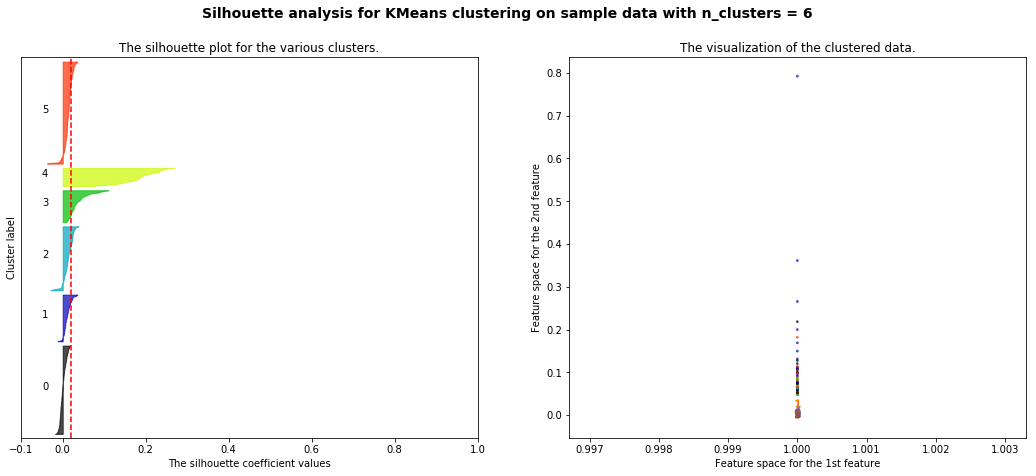

7
For n_clusters = 7 The average silhouette_score is : 0.0211533967231


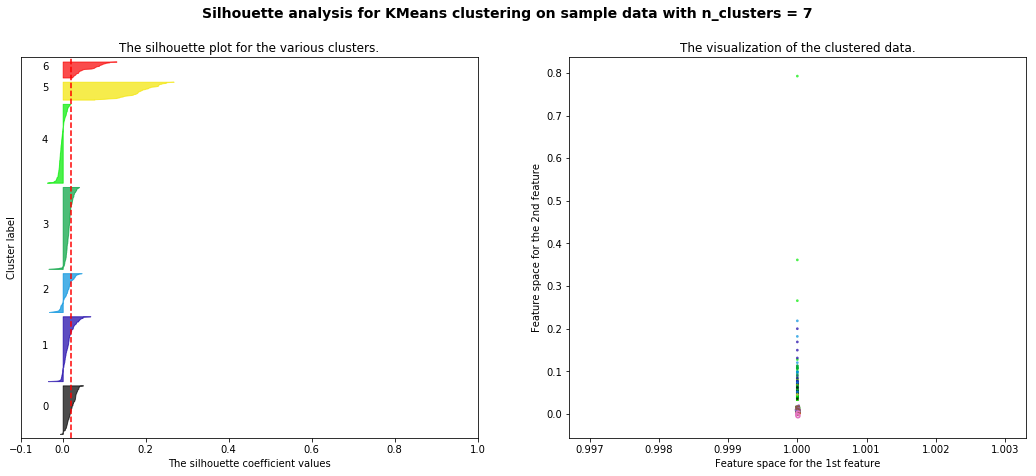

8
For n_clusters = 8 The average silhouette_score is : 0.0231159038647


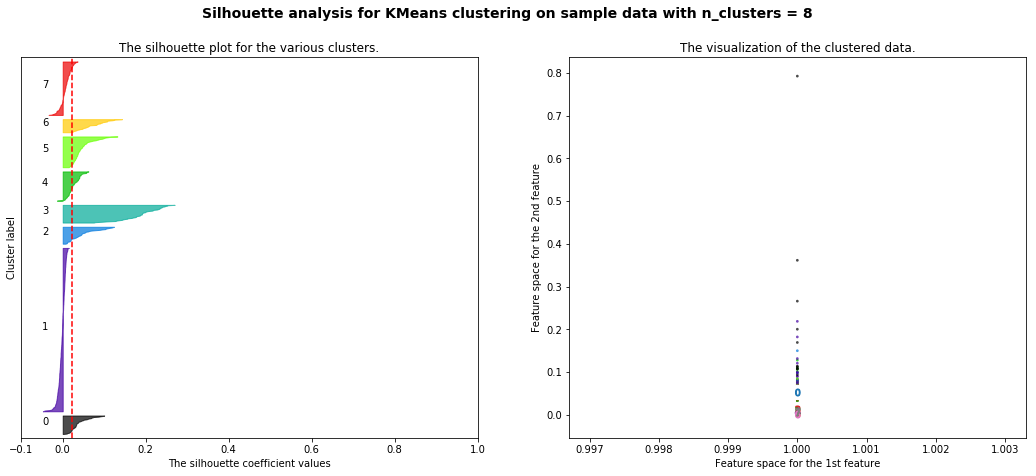

9
For n_clusters = 9 The average silhouette_score is : 0.021769501209


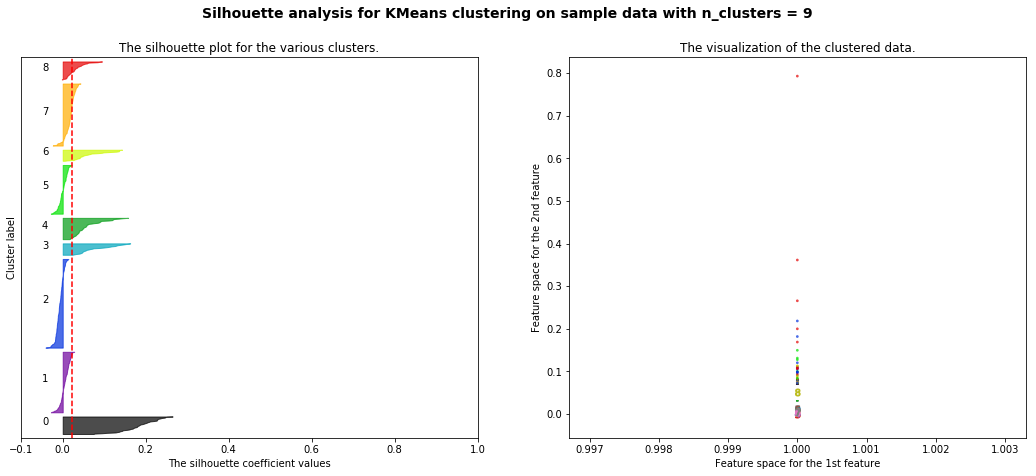

10
For n_clusters = 10 The average silhouette_score is : 0.0239993634282


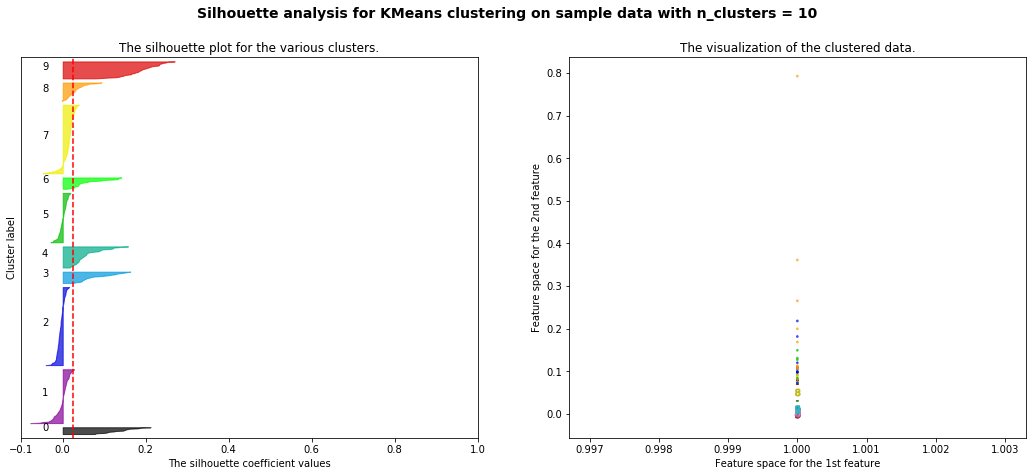

11
For n_clusters = 11 The average silhouette_score is : 0.0264875900178


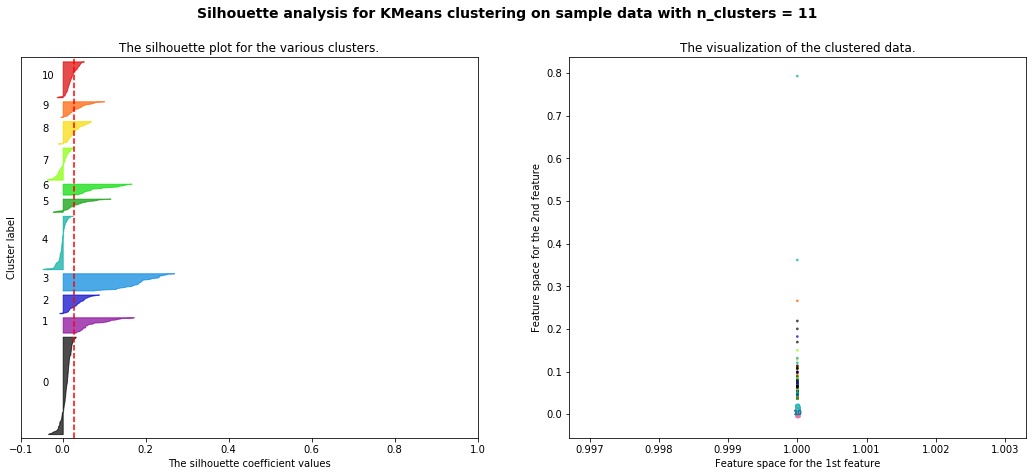

12
For n_clusters = 12 The average silhouette_score is : 0.026578927435


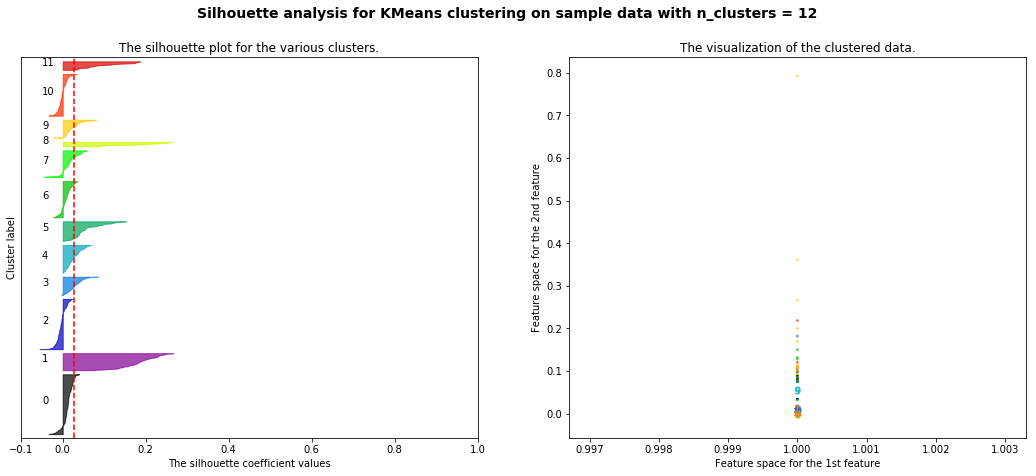

13
For n_clusters = 13 The average silhouette_score is : 0.0276653587688


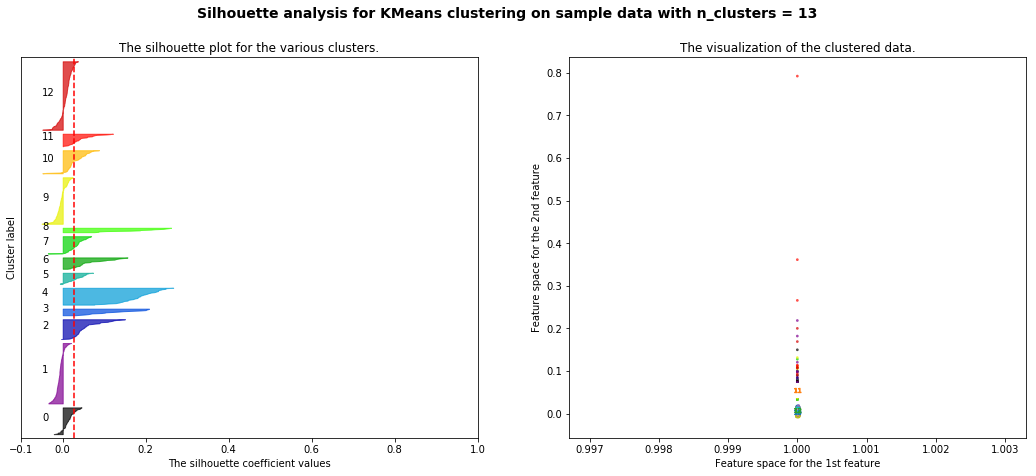

14
For n_clusters = 14 The average silhouette_score is : 0.0292633517666


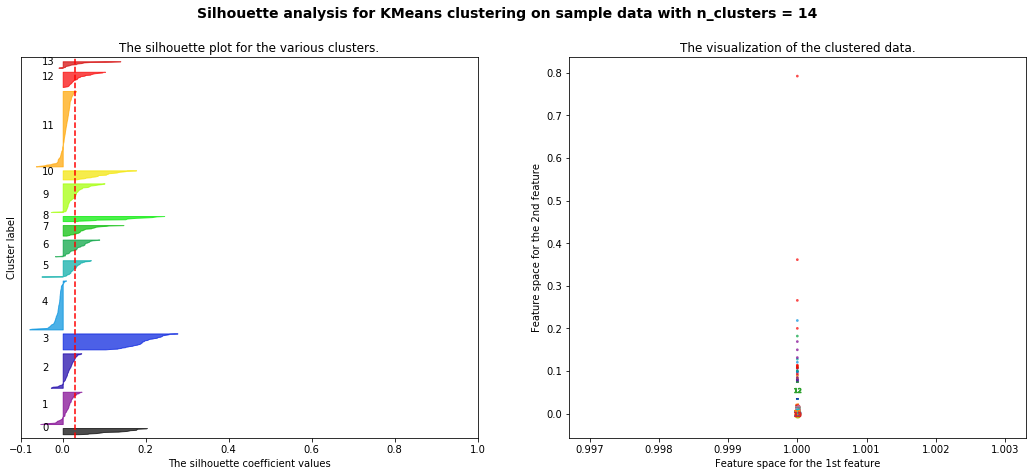

15
For n_clusters = 15 The average silhouette_score is : 0.0264502581965


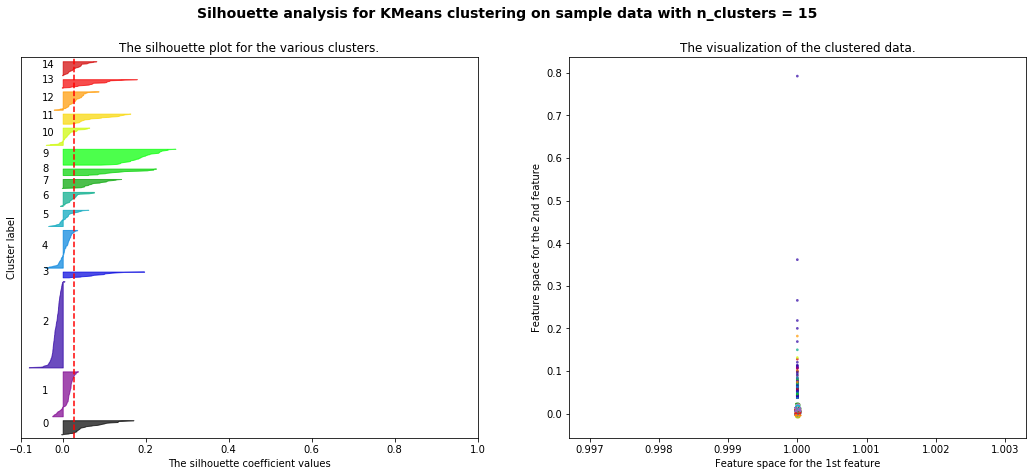

16
For n_clusters = 16 The average silhouette_score is : 0.0311419537741


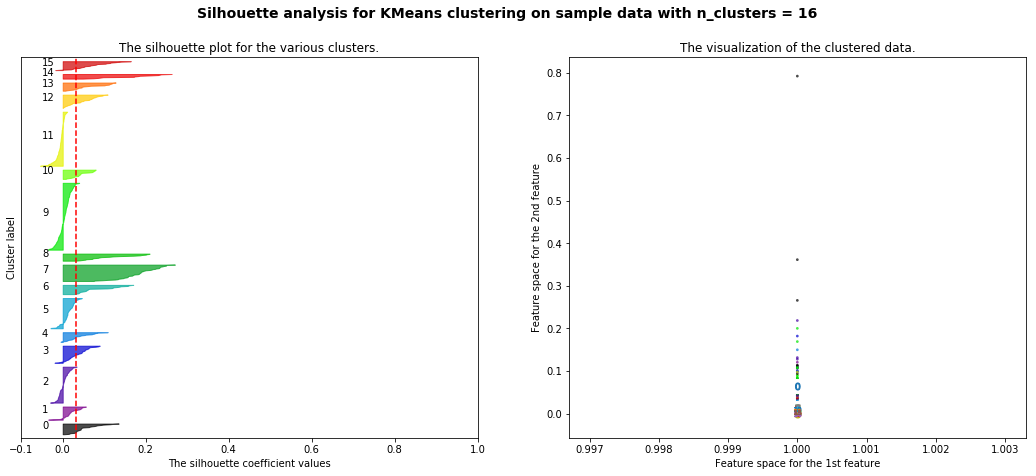

17
For n_clusters = 17 The average silhouette_score is : 0.0329278860846


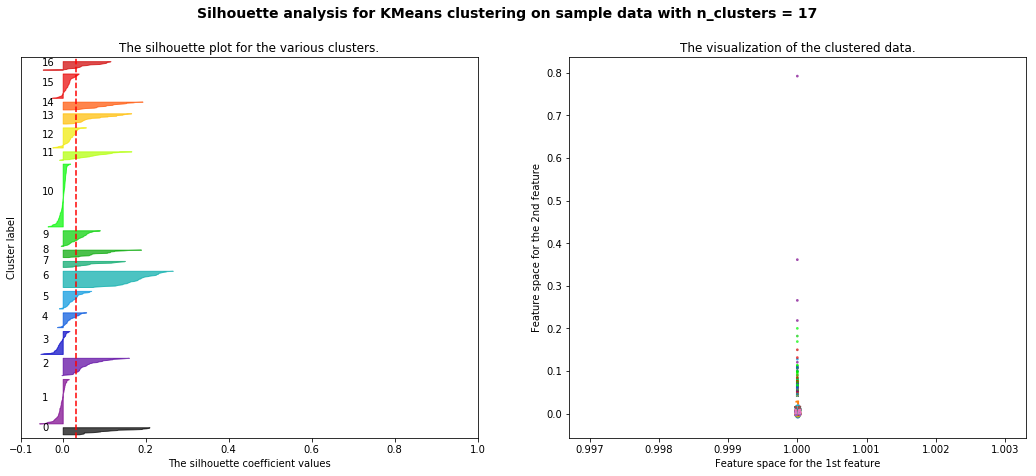

18
For n_clusters = 18 The average silhouette_score is : 0.0310689435693


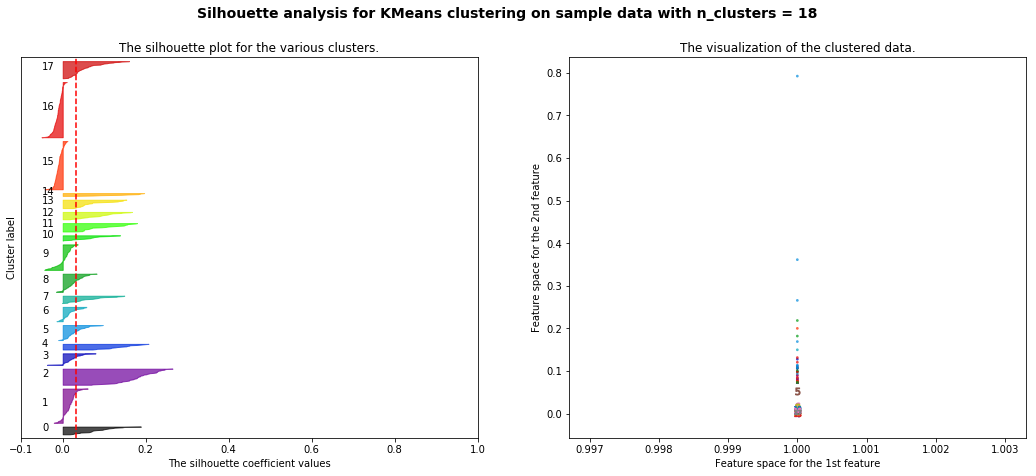

19
For n_clusters = 19 The average silhouette_score is : 0.0316878330887


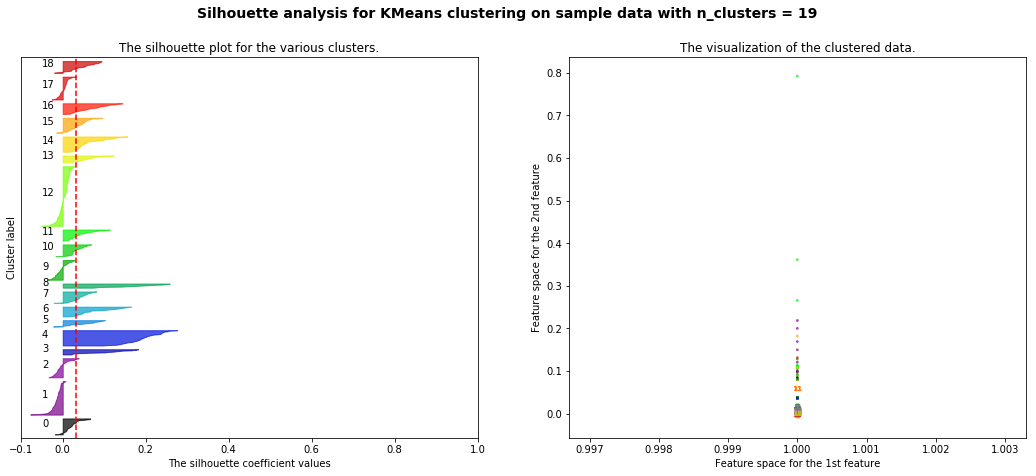

-----> Done


In [22]:
# Fazendo pelo Silhouette de novo
# Reference: http://www.awesomestats.in/python-cluster-validation/

print('-------- Definindo melhor numero de clusters pelo Silhouette --------')

X_scaled = X_treino

cluster_range = range( 6, 20 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

print('-----> Done')